# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Feature Engineering Homework
 
Perform feature engineering on a dataset to transform data into a suitable form for a machine learning algorithm.

__Bonus__: Make nice (and _useful_) data visualisation plots.

### The dataset

The [Concrete](https://www.kaggle.com/sinamhd9/concrete-comprehensive-strength) il set di dati contiene una varietà di formulazioni di calcestruzzo e la resistenza alla compressione del prodotto risultante, che è una misura del carico che quel tipo di calcestruzzo può sopportare. Per tua informazione, il compito di questo set di dati è prevedere la resistenza alla compressione di un calcestruzzo data la sua formulazione.

In [20]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# scikit-learn variables engineering
from sklearn.preprocessing import MinMaxScaler, StandardScaler


%matplotlib inline
%config InlineBackend.figure_format = "retina"

# set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 13)})

### Import data

In [21]:
url_data = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/concrete.csv"

df = pd.read_csv(url_data)
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


<details>
    <summary><b>Hints and suggestions</b></summary> 
    You can see here the various ingredients going into each variety of concrete. 
    Here some suggestions that you might find useful.
    <ul>
        <li> Adding some additional synthetic features derived from the original ones in the dataset can help a model to learn important relationships among them.</li>
        <li> Try to establish a <b>baseline</b> (_e.g._ a simple stupid model) by training the model on the untouched dataset. This will help you determine whether our new features are actually useful.</li>
    </ul>
    Establishing baselines like this is good practice at the start of the feature engineering process. A baseline score can help you decide whether your new features are worth keeping, or whether you should discard them and possibly try something else.        
</details>


---

## Your work

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Comment
- 1 non ci sono dati nulli

## Contenuto del dataset
Sono indicati il nome della variabile, il tipo di variabile, l'unità di misura e una breve descrizione. La resistenza alla compressione del calcestruzzo è il problema della regressione. L'ordine di questo elenco corrisponde all'ordine dei numeri lungo le righe del database.

Nome -- Tipo di dati -- Misurazione -- Descrizione

Cemento (componente 1) -- quantitativo -- kg in una miscela m3 -- Scorie di altoforno variabili
in ingresso (componente 2) -- quantitativo -- kg in una miscela m3 -- Ceneri volanti variabili
in ingresso (componente 3) -- quantitativo -- kg in una miscela m3 -- Acqua variabile
in ingresso (componente 4) -- quantitativo -- kg in una miscela m3 -- Superplastizzatore variabile
in ingresso (componente 5) -- quantitativo -- kg in una miscela m3 -- Variabile
in ingresso Aggregato grossolano (componente 6) -- quantitativo -- kg in una miscela m3 -- Aggregato fine variabile
in ingresso (componente 7) -- quantitativo -- kg in una miscela m3 -- Età variabile
di input -- quantitativo -- Giorno (1~ 365) -- Resistenza alla compressione del calcestruzzo variabile
in ingresso -- quantitativo -- MPa -- Variabile di uscita

Numero di istanze 1030
Numero di attributi 9
Ripartizione degli attributi 8 variabili di input quantitative e 1 variabile
di output quantitativa Valori degli attributi mancanti Nessuno 

AGE= giorni trascorsi da impasto del cemento armato


In [23]:
df.describe() # non verifichiamo le variabili quanlitative poichè non ce ne sono

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


verifichiamo la distribuzione delle variabili

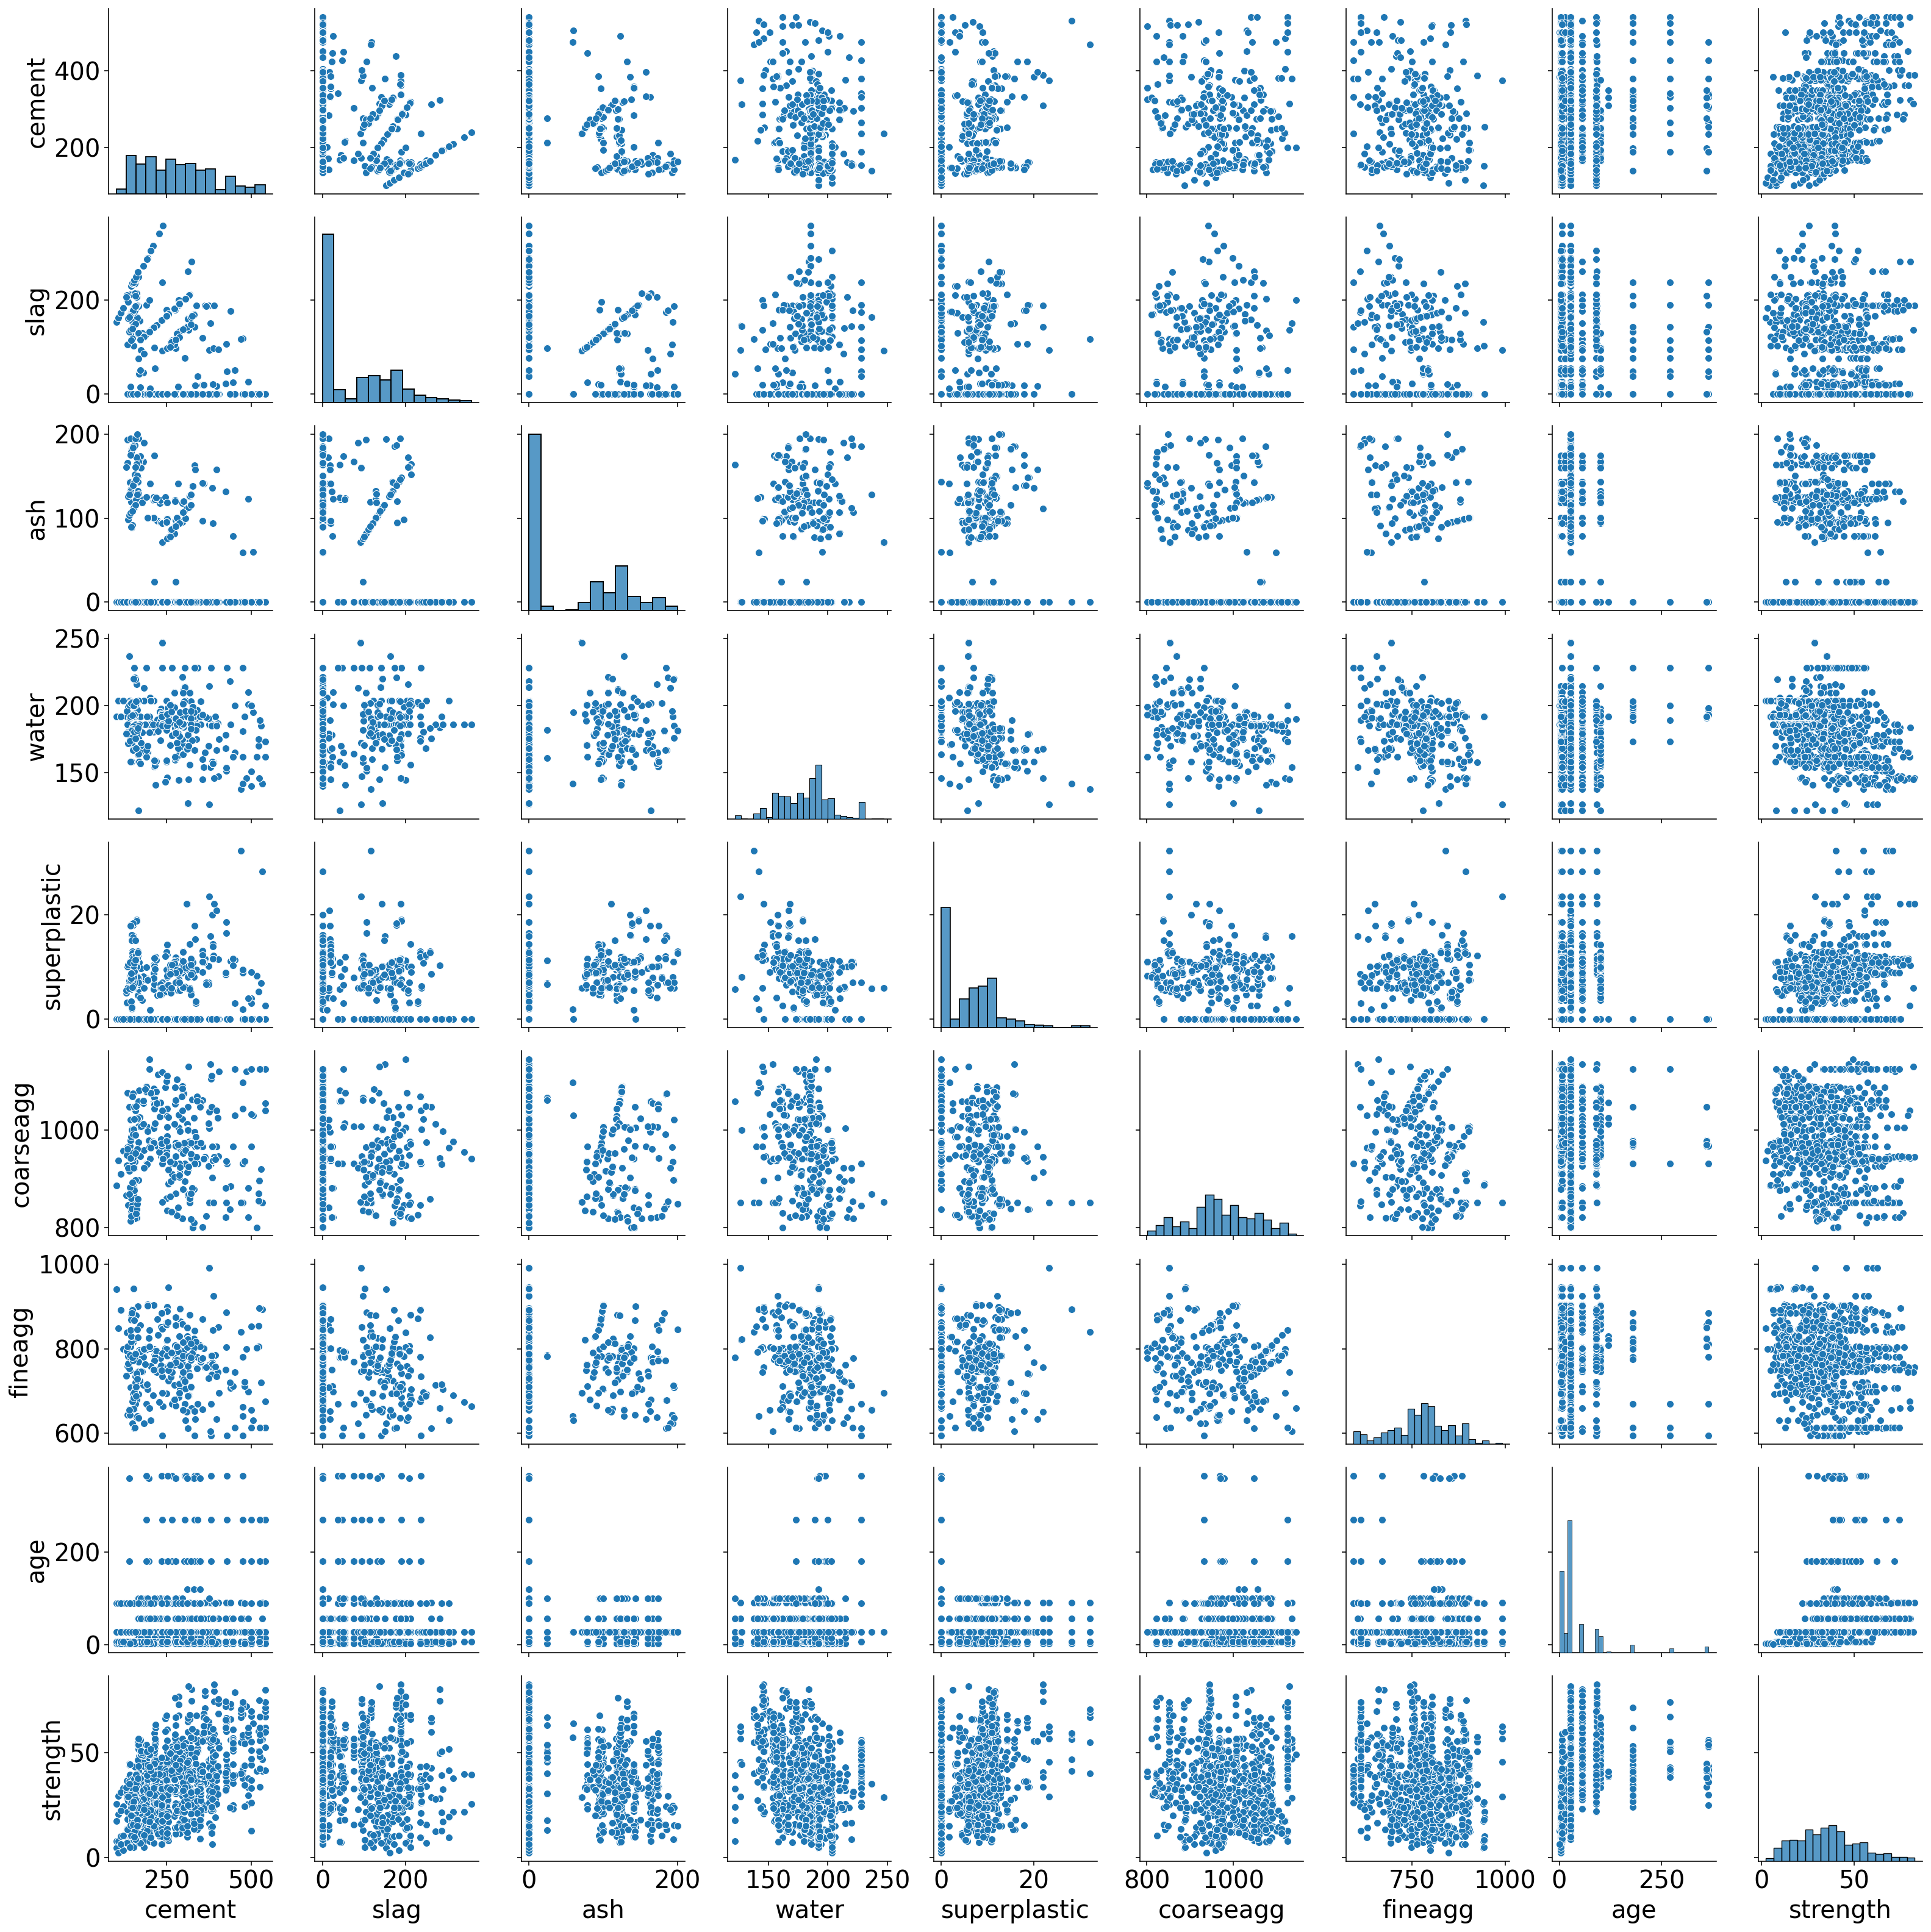

In [15]:
sns.pairplot(df)


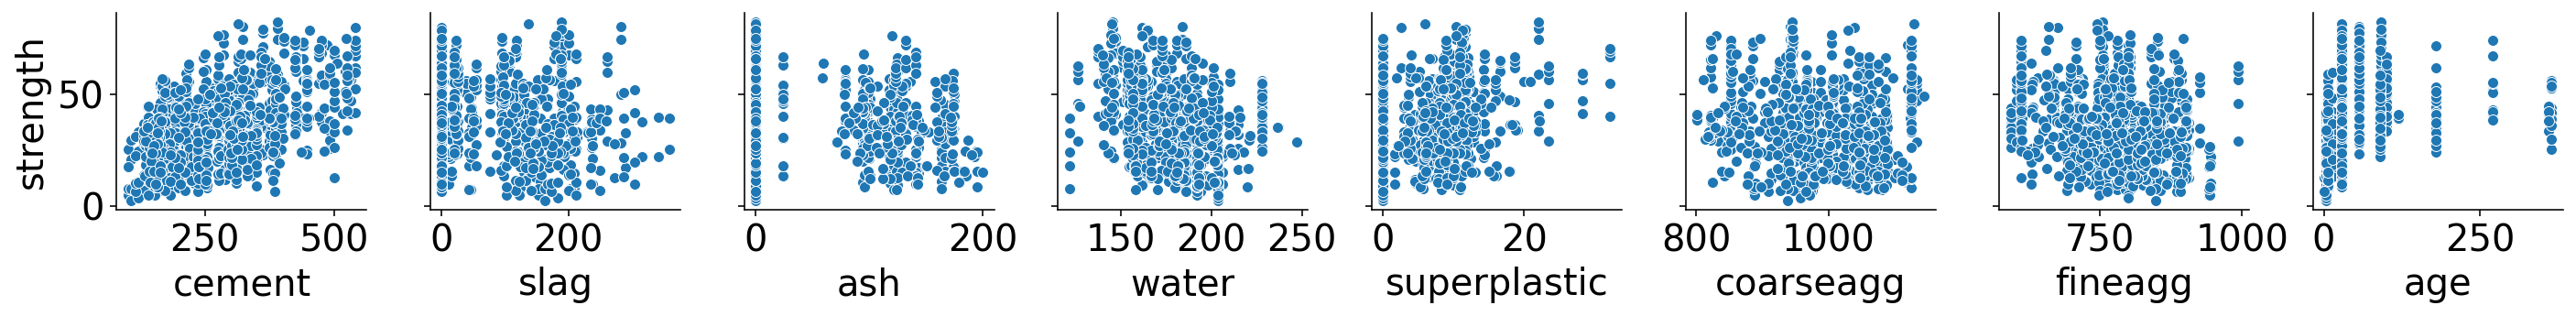

In [100]:
sns.pairplot(
    df,
    x_vars=["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "age"],
    y_vars=["strength"],
)

<AxesSubplot:xlabel='strength', ylabel='cement'>

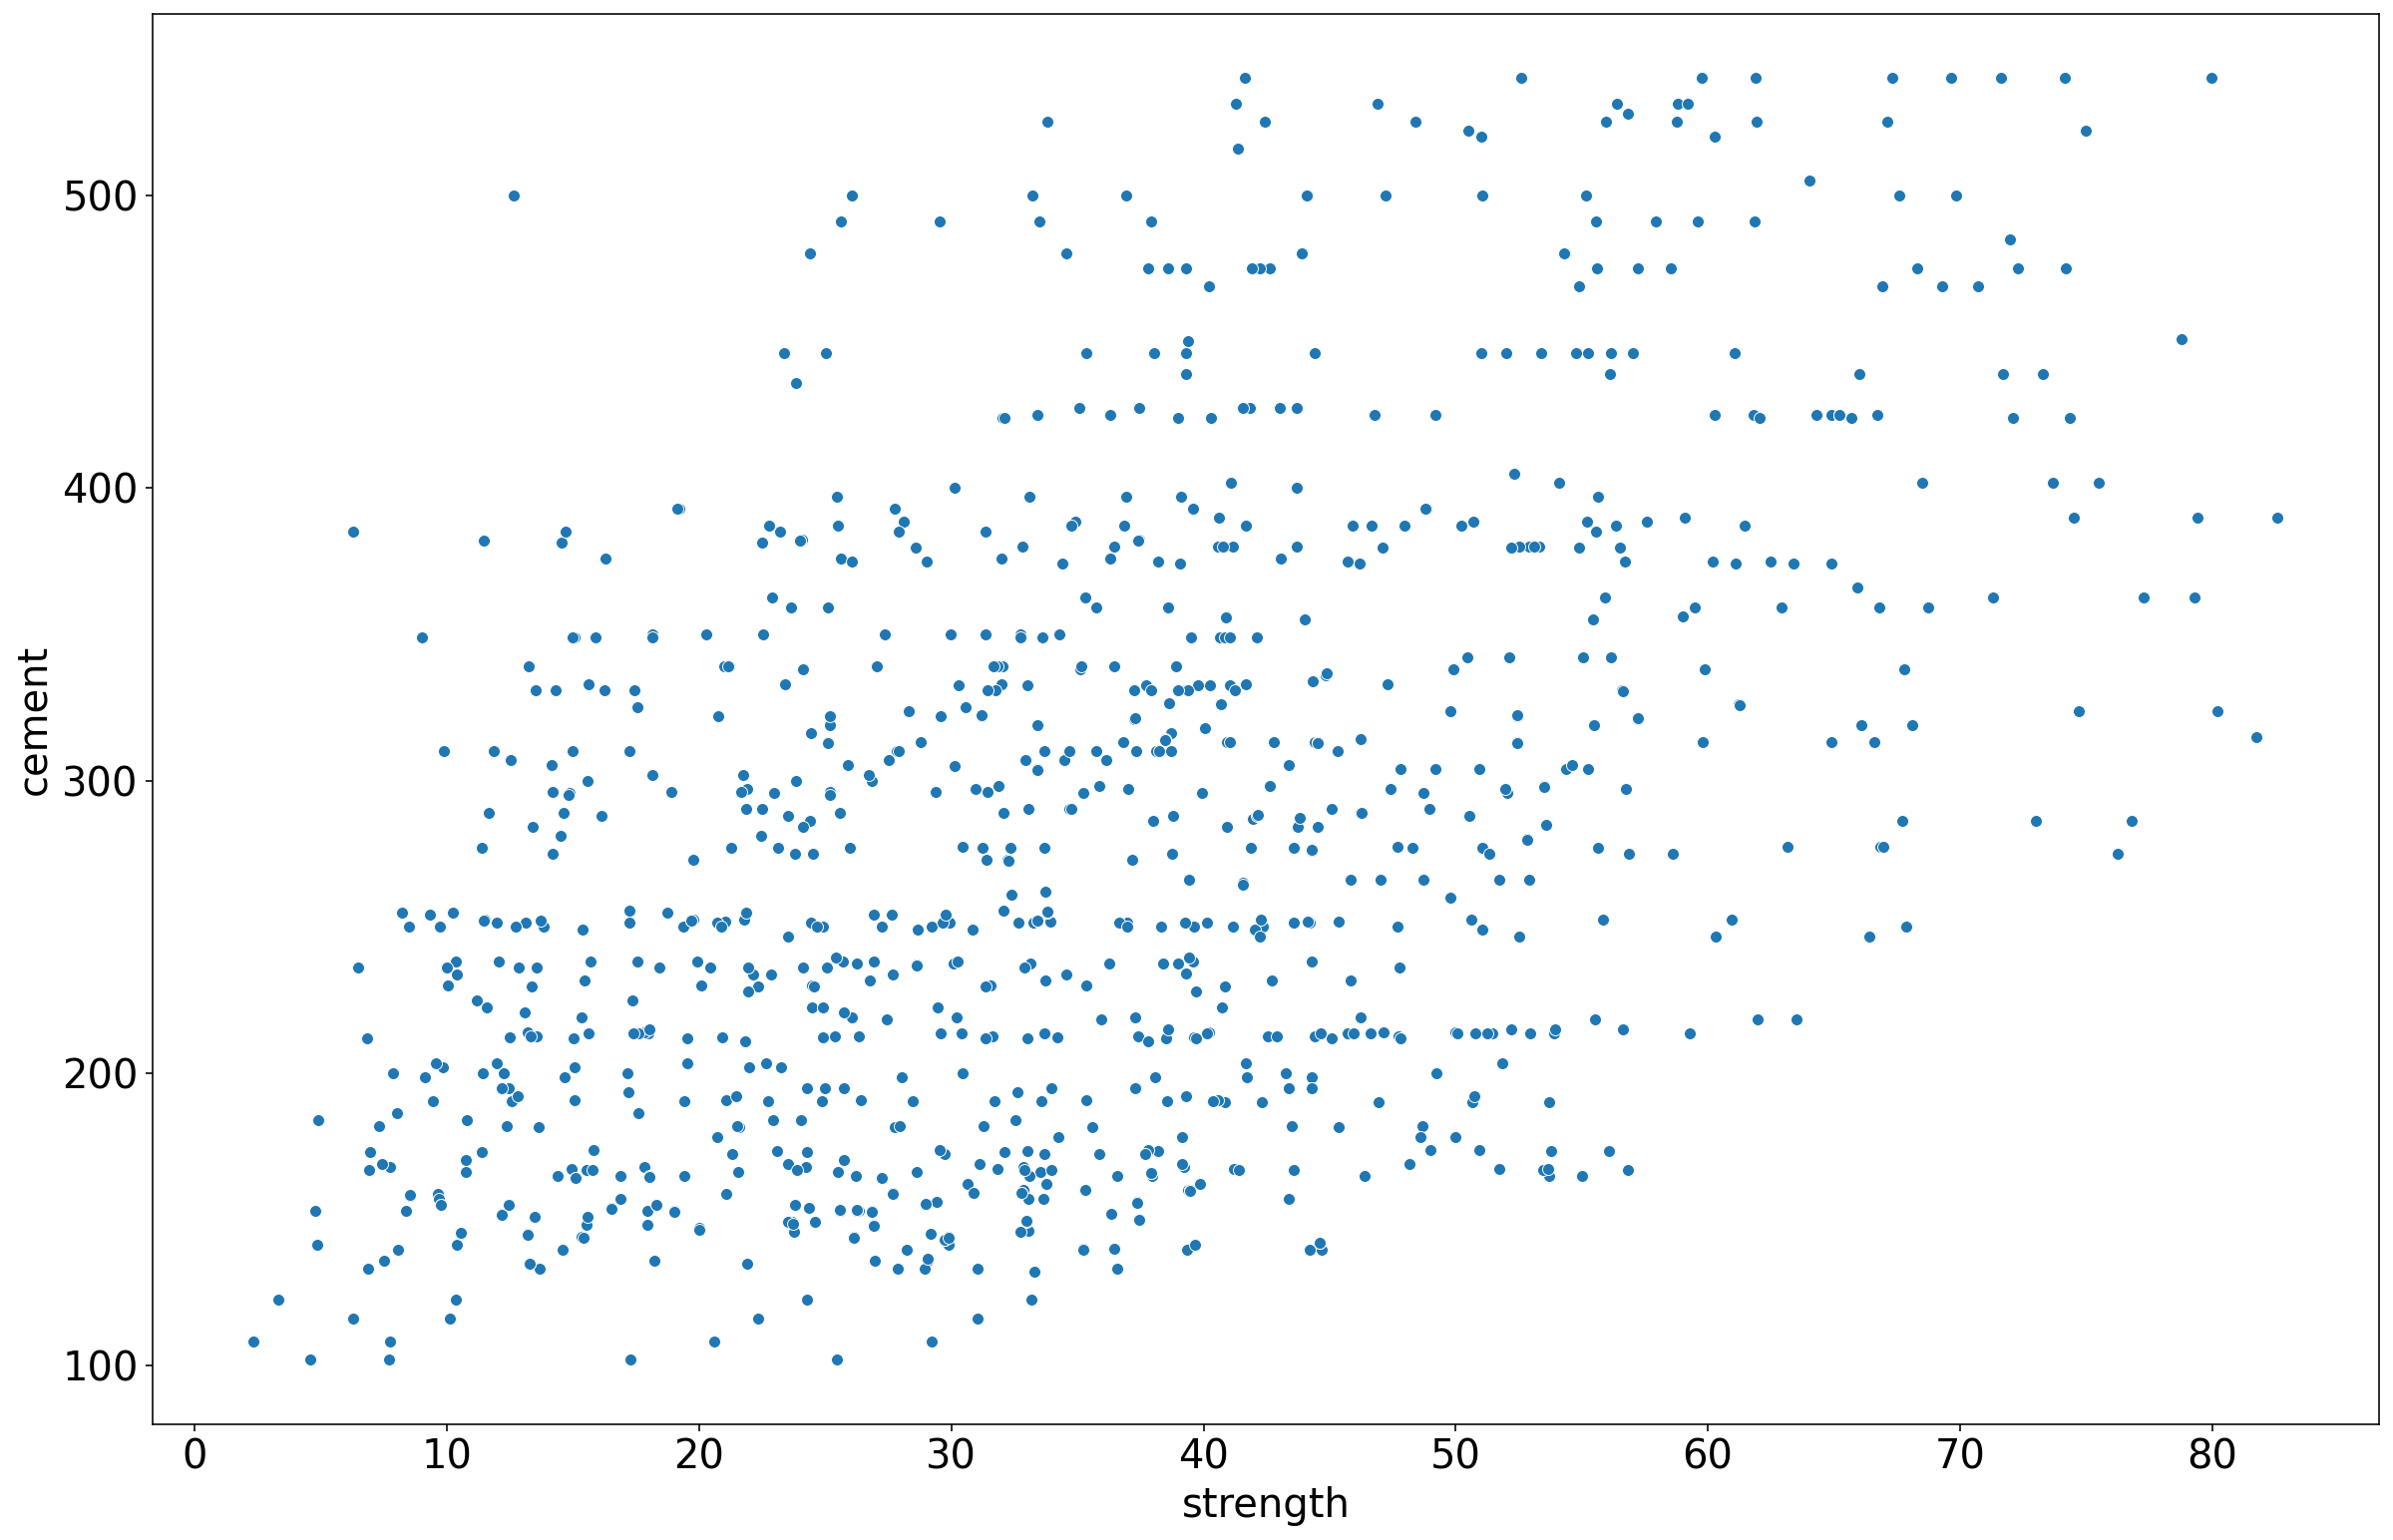

In [98]:
sns.scatterplot(x = df['strength'], y = df['cement'])

#NOTE

CORRELAZIONE DELLE VARIE VARIABILI CON LA FORZA CON SNS PAIRPLOT
dividere i dati in 20% di test e 80% di train
fare trasformaioni su 80, fit_transform su 80 - transform su 20
knn senza toccare dil dataset per vedere l'accuratezza
normalizzazione dei dati min-max
modelizzazione ed accuratezza (senza age)
modificare il dataset col processing
dividere i dati in 20% di test e 80% di train

standardizzazione senza e con age

differenze tra prima e dopo il pre-processing

considerazioni di Oscar ultimi 10 minuti:
somma di variabili potrebbe andare bene ma la somma è super sensibile alla scala
fare più grafici
vedere distribuzioni è utile
vedere correlazioni è utile




### Normalisation using sklearn

In [25]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [35]:
# Only numerical variables
X = df[["cement",	"slag",	"ash",	"water",	"superplastic",	"coarseagg",	"fineagg",	"age"]].values
#y = df.age.values
z = df.strength.values
# fit scaler on training data
scaler = MinMaxScaler().fit(X)

# transform training data
X_norm = scaler.transform(X)

In [37]:
df_norm = pd.DataFrame(X_norm, columns=["cement",	"slag",	"ash",	"water",	"superplastic",	"coarseagg",	"fineagg",	"age"])

df_norm.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.409059,0.205609,0.270806,0.477374,0.192691,0.499764,0.450528,0.122698
std,0.238599,0.240065,0.319825,0.170561,0.185523,0.226029,0.201144,0.173544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.206336,0.000000,0.000000,0.344249,0.000000,0.380814,0.343578,0.016484
50%,0.390183,0.061213,0.000000,0.504792,0.198758,0.485465,0.465379,0.074176
75%,0.566210,0.397746,0.591204,0.560703,0.316770,0.663953,0.577020,0.151099
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Standardisation using sklearn

In [38]:
# fit scaler on training data
scaler = StandardScaler().fit(X)

# transform training data
X_std = scaler.transform(X)
df_std = pd.DataFrame(X_std, columns=["cement",	"slag",	"ash",	"water",	"superplastic",	"coarseagg",	"fineagg",	"age"])

df_std.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,-3.862875e-16,8.057740e-16,9.156645e-17,1.746176e-17,-3.951532e-16,7.295135e-16,-2.917030e-16,1.534910e-16
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.568879e-01,-8.471439e-01,-2.800211e+00,-1.039143e+00,-2.212138e+00,-2.240917e+00,-7.073594e-01
25%,-8.500535e-01,-8.568879e-01,-8.471439e-01,-7.808939e-01,-1.039143e+00,-5.265174e-01,-5.319697e-01,-6.123314e-01
50%,-7.915193e-02,-6.017783e-01,-8.471439e-01,1.608294e-01,3.271508e-02,-6.329352e-02,7.386739e-02,-2.797331e-01
75%,6.589606e-01,8.007446e-01,1.002278e+00,4.887927e-01,6.691307e-01,7.267605e-01,6.291661e-01,1.637312e-01
max,2.477915e+00,3.310675e+00,2.281084e+00,3.065647e+00,4.353642e+00,2.214224e+00,2.733062e+00,5.057677e+00


### Comparing unscaled, normalised and standardised data

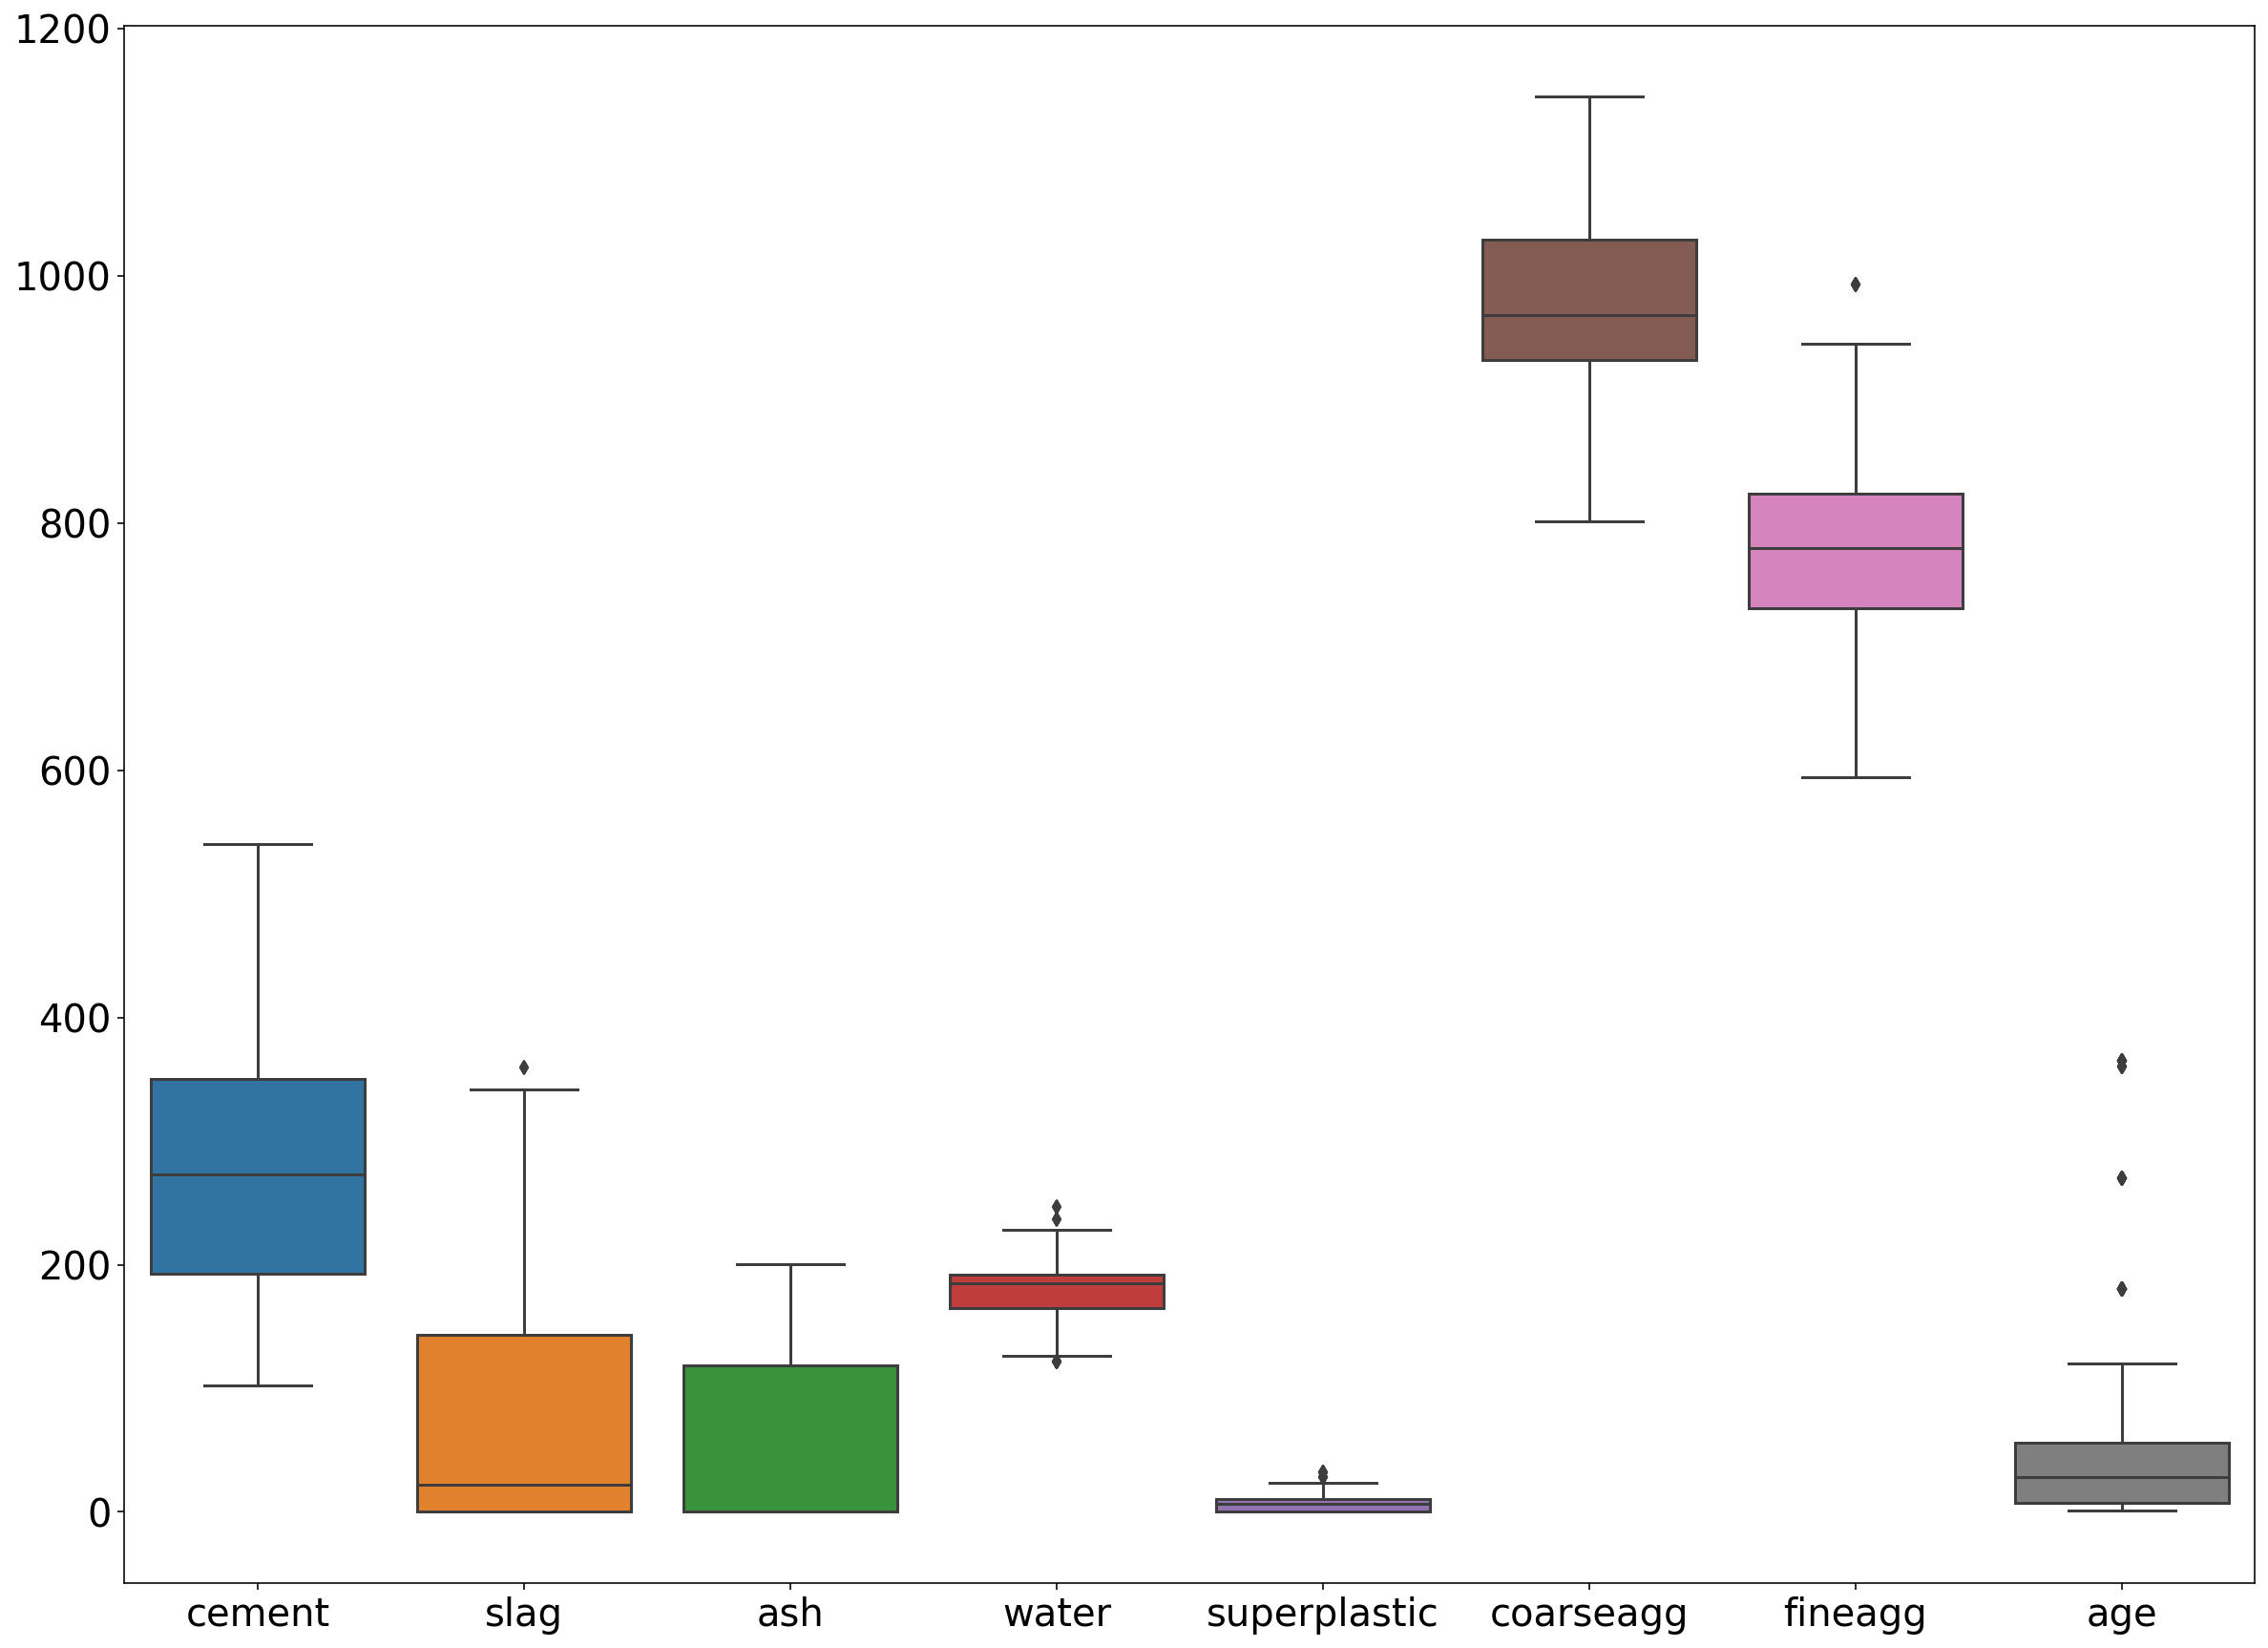

In [40]:
num_cols = ["cement",	"slag",	"ash",	"water",	"superplastic",	"coarseagg",	"fineagg",	"age"]

#plot unscaled
plt.figure(figsize=(20,15))
sns.boxplot(data=df[num_cols]);

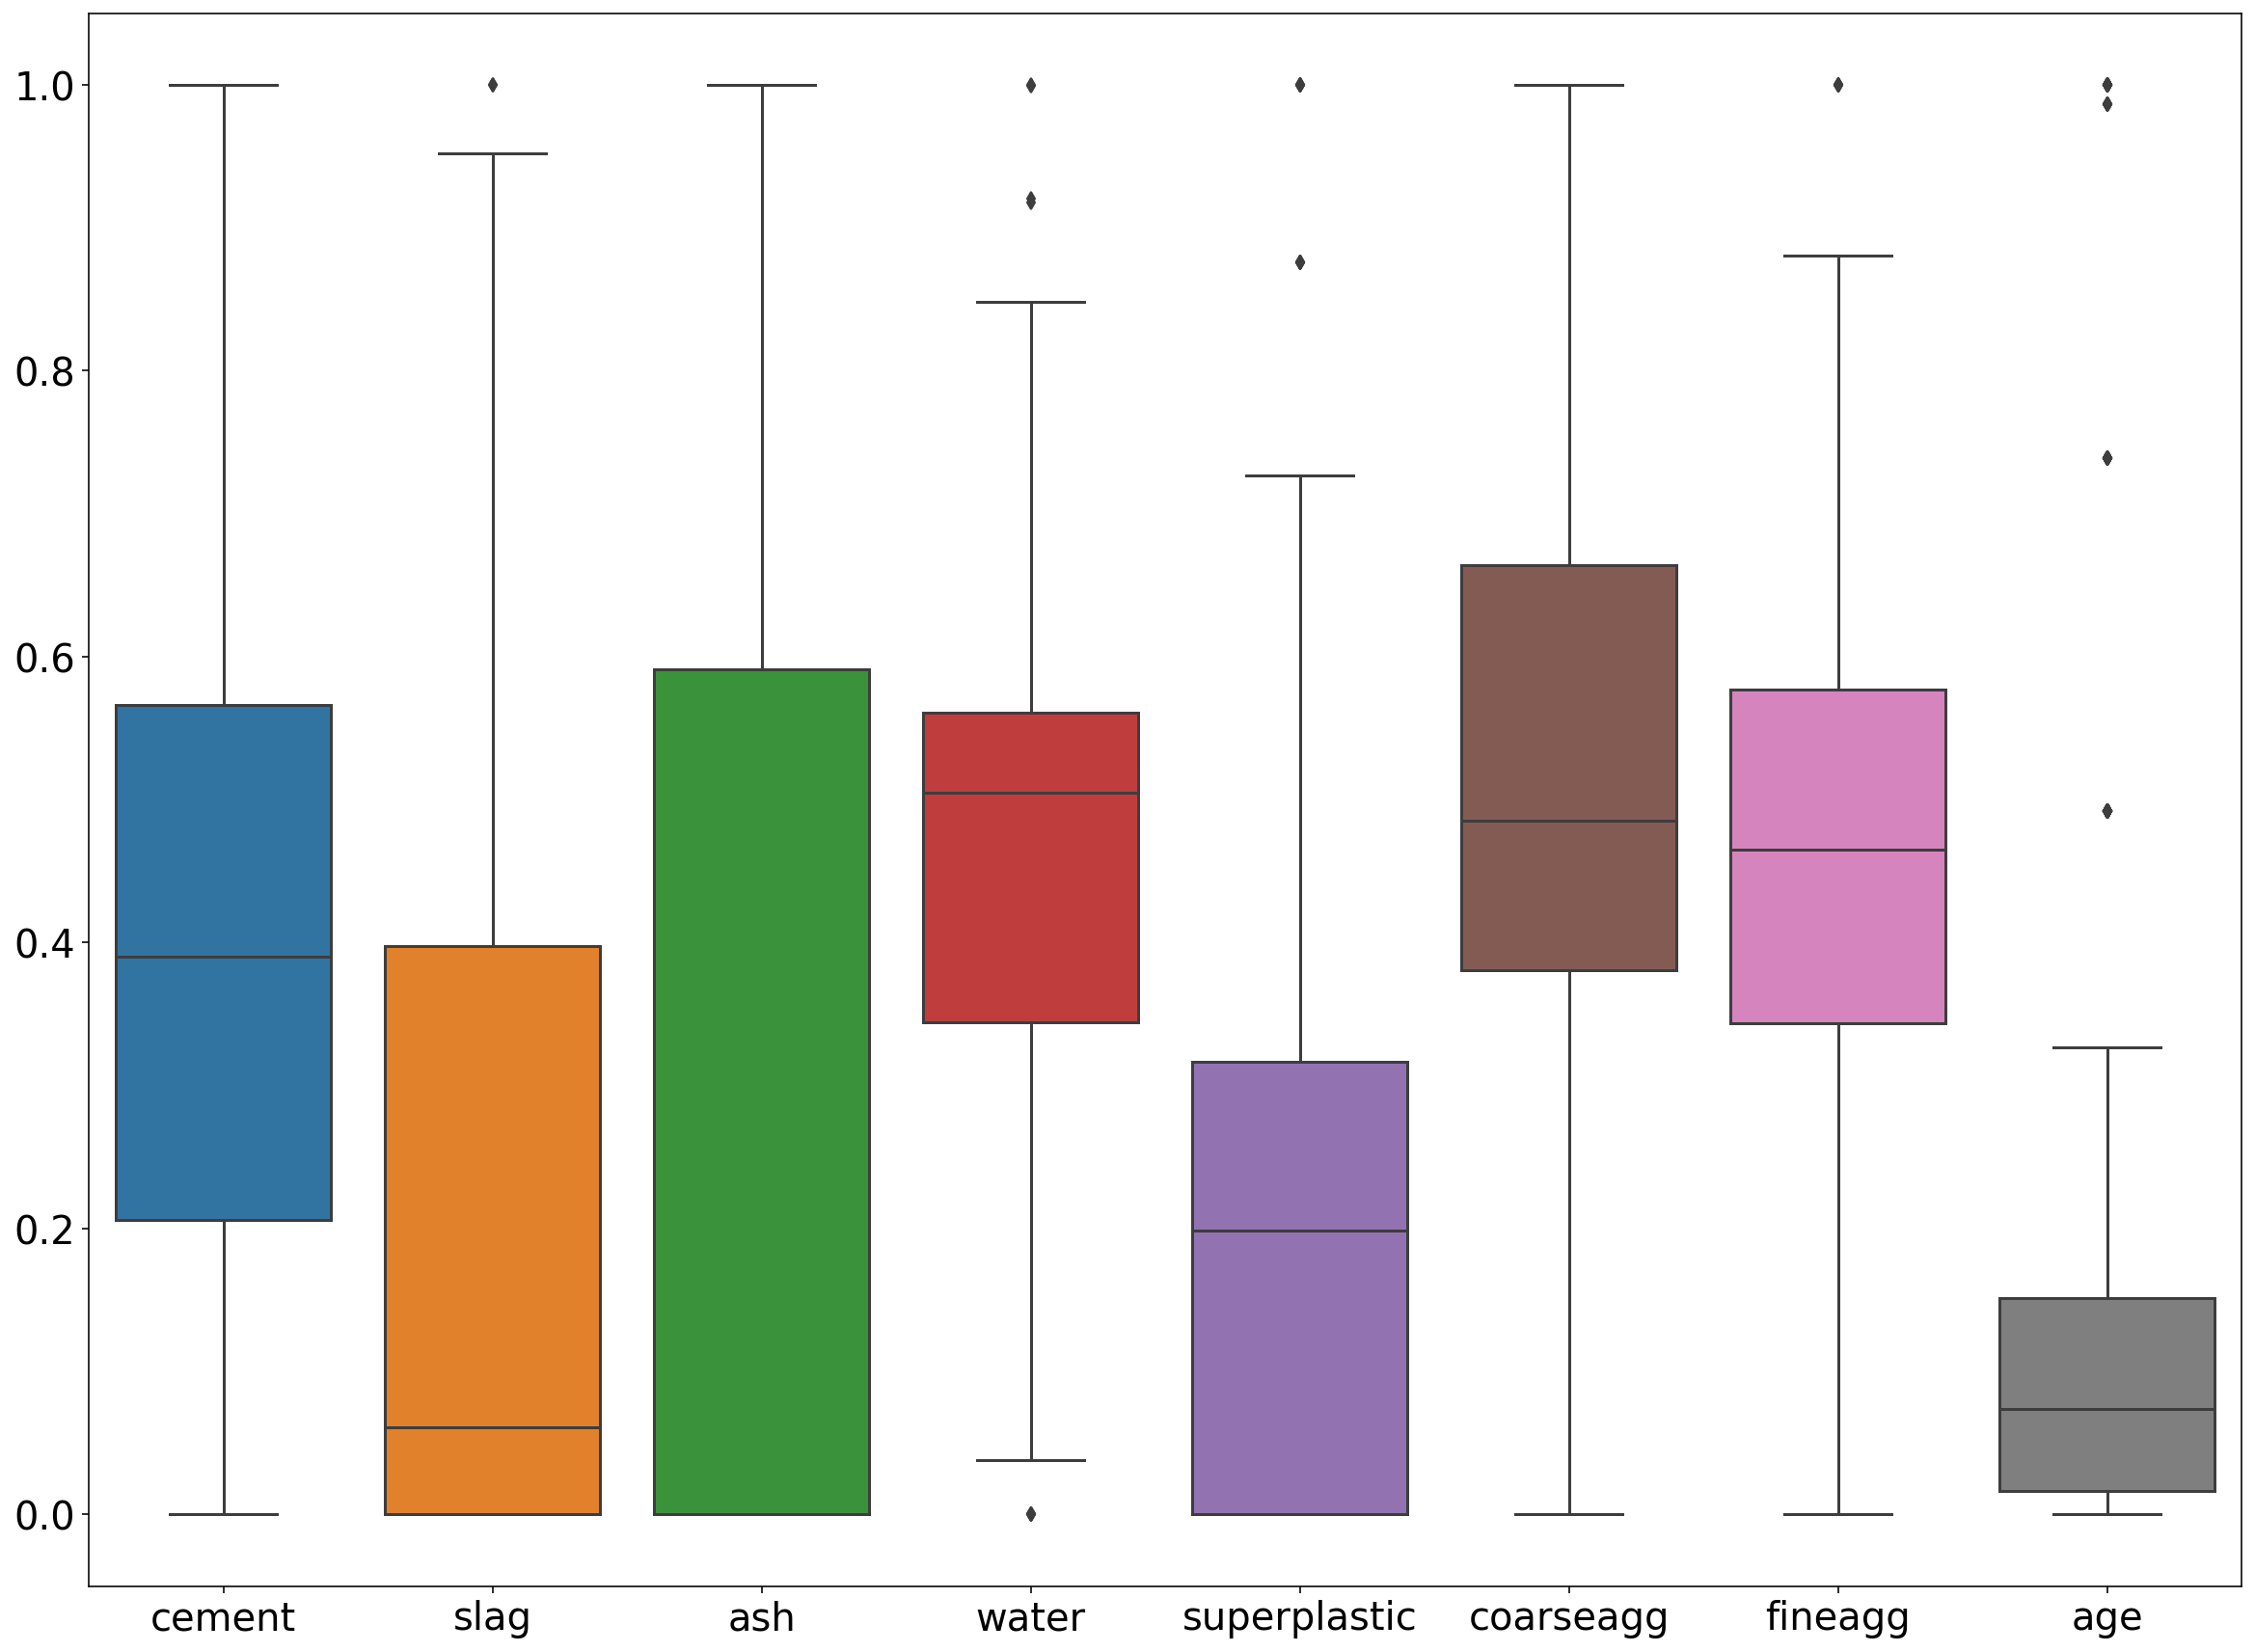

In [41]:
#plot normalised
plt.figure(figsize=(20,15))
sns.boxplot(data=df_norm[num_cols]);

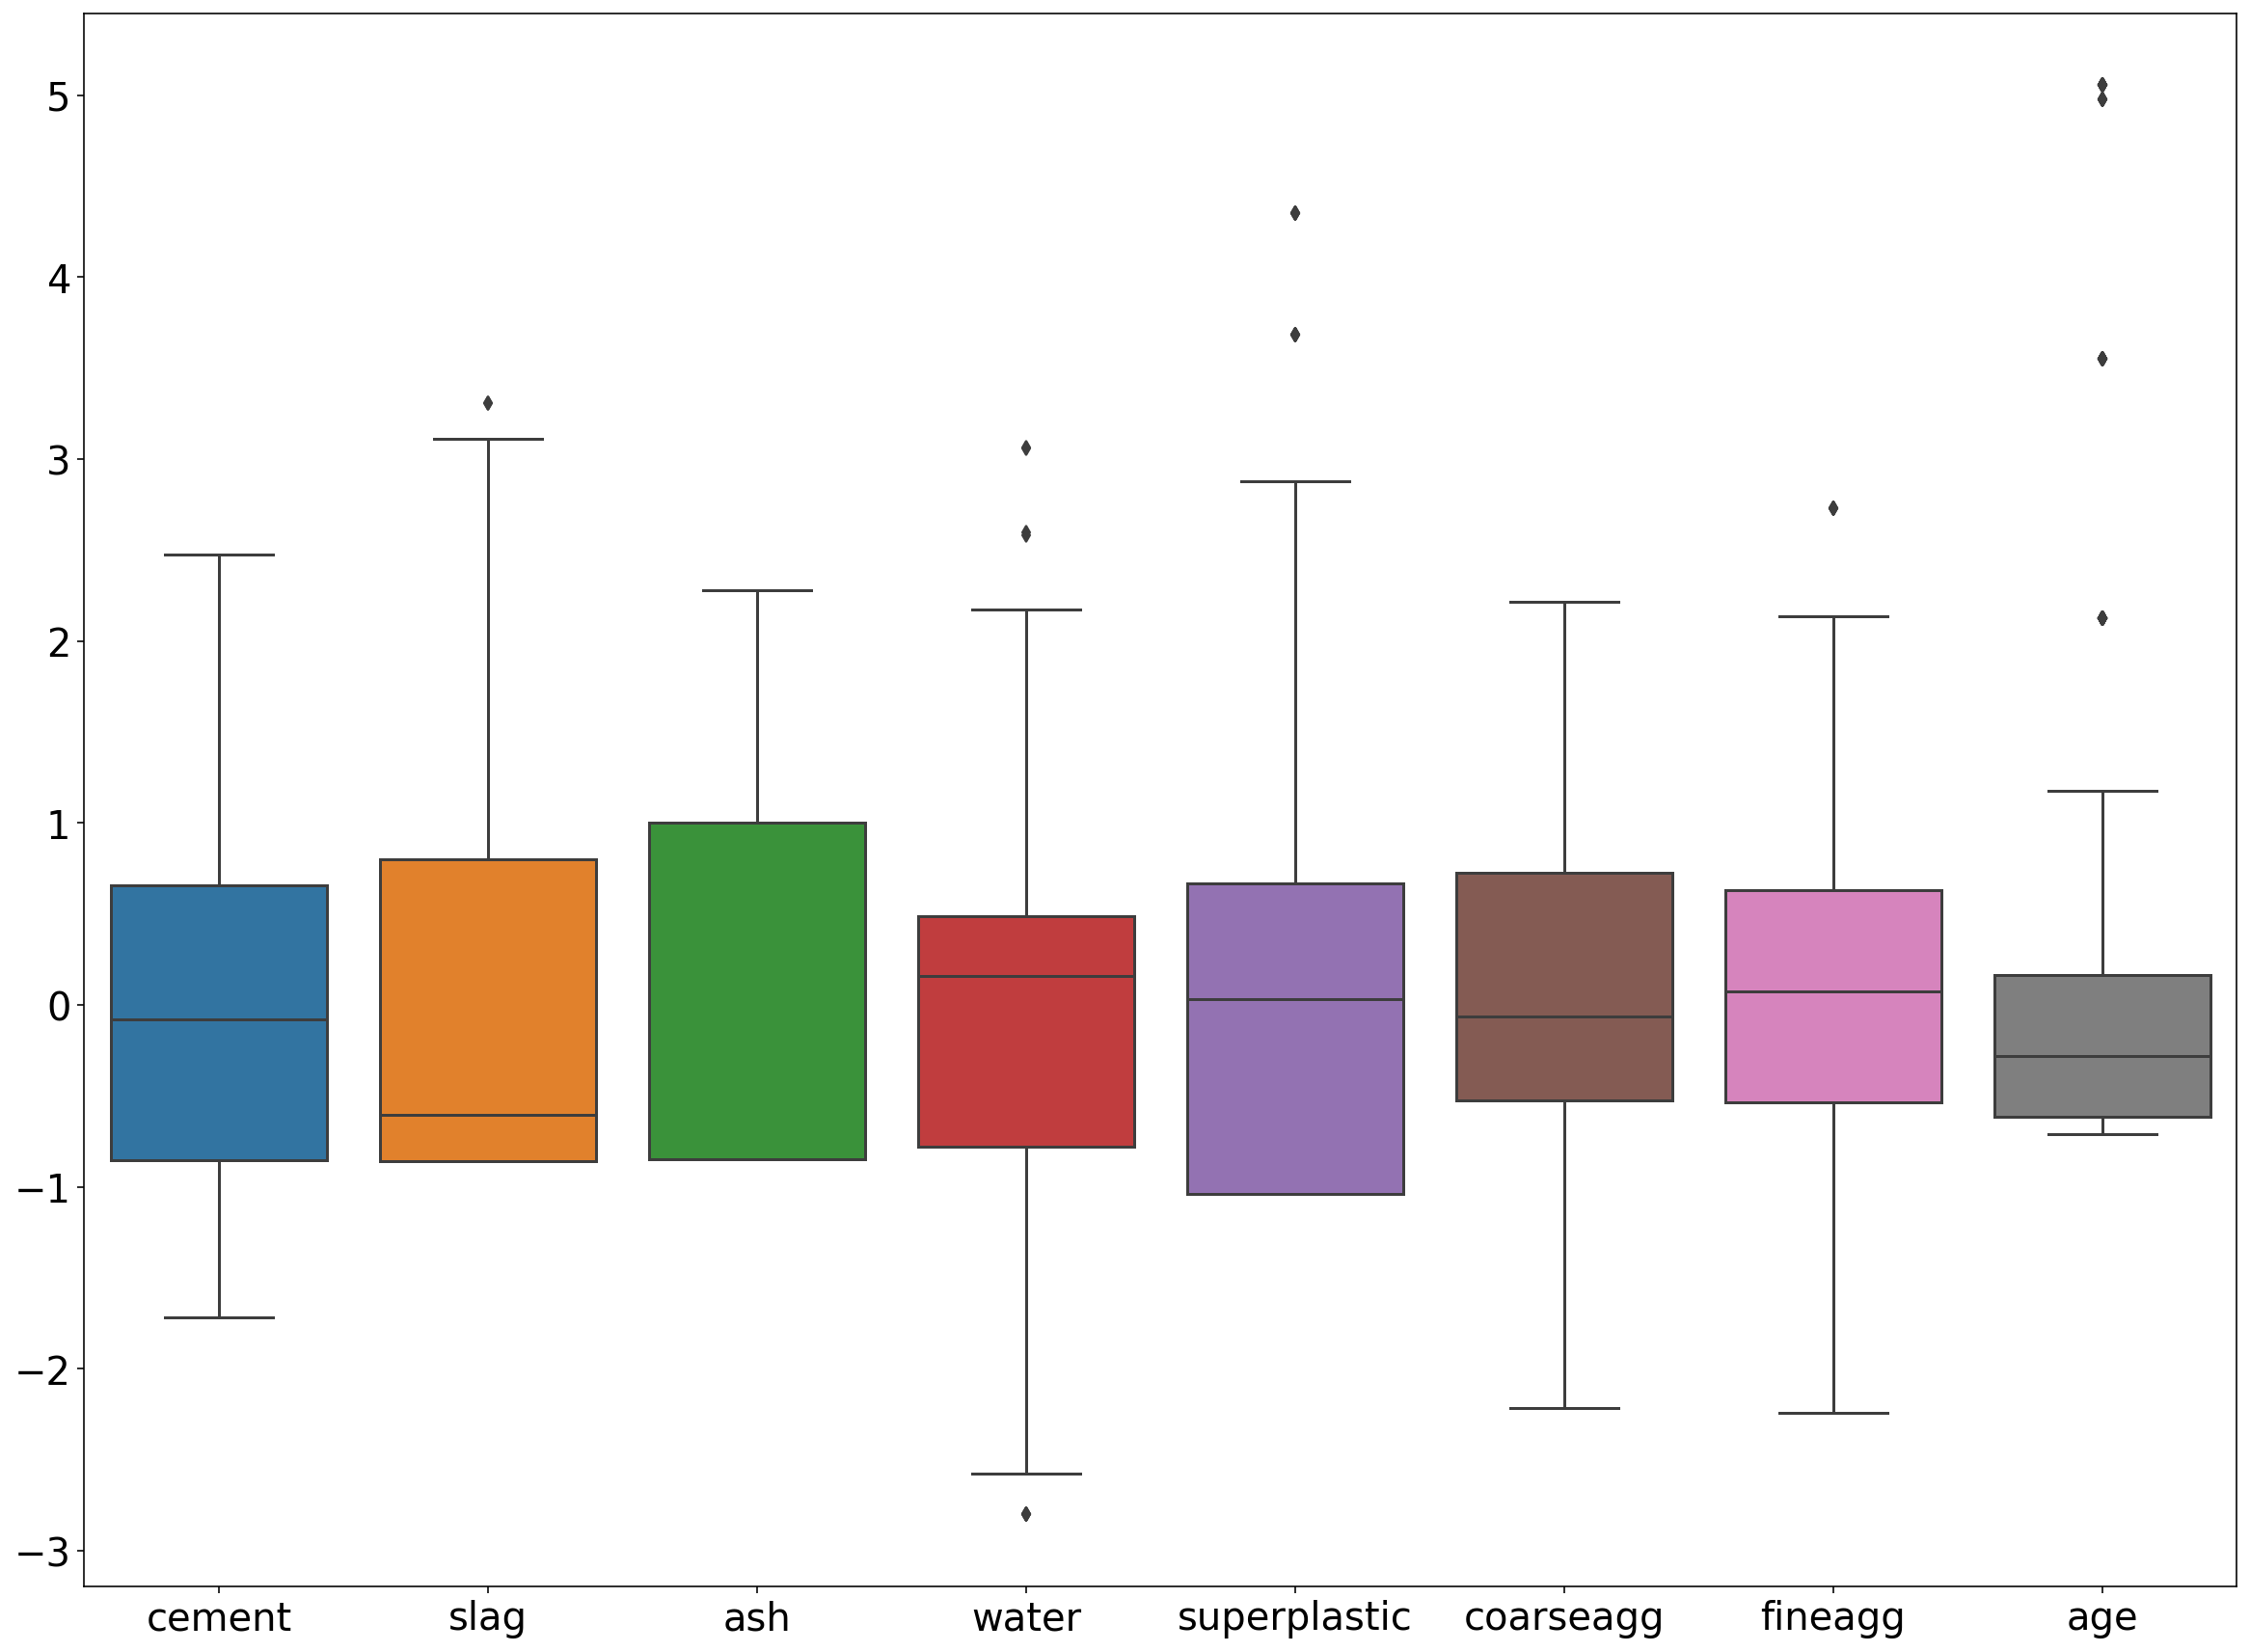

In [42]:
#plot standardised
plt.figure(figsize=(20,15))
sns.boxplot(data=df_std[num_cols]);

### Valutazione dati not Scaled

#### Split the data set into training and testing

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [114]:
print("Lunchezza dataset di training:",len(X_train))
print("Lunchezza target di training:",len(y_train))
print("Lunchezza dataset di test:",len(X_test))
print("Lunchezza target di test:",len(y_test))

Lunchezza dataset di training: 824
Lunchezza target di training: 824
Lunchezza dataset di test: 206
Lunchezza target di test: 206


In [115]:
# Usiamo sklearn  per chiamare KneighborsClassifier con K = 5 (n_neighbors). 
# k= radice 4 di 800 = 5
#La funzione di adattamento ci consente di memorizzare il nostro dataset di dati di allenamento.

from sklearn.neighbors import KNeighborsRegressor


KNN_Regressor = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto',  metric='euclidean', metric_params=None, n_jobs=None)


KNN_Regressor.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', weights='distance')

In [116]:
perc_prec = KNN_Regressor.score(X_test, y_test)*100
print(f"Percentuale di precisione dell'Algoritmo: {(perc_prec.round(2))}%")

Percentuale di precisione dell'Algoritmo: 97.04%


### Valutazione dati Normalizzati

#### Split the data set into training and testing

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=0)

In [118]:
print("Lunchezza dataset di training:",len(X_train))
print("Lunchezza target di training:",len(y_train))
print("Lunchezza dataset di test:",len(X_test))
print("Lunchezza target di test:",len(y_test))

Lunchezza dataset di training: 824
Lunchezza target di training: 824
Lunchezza dataset di test: 206
Lunchezza target di test: 206


In [119]:
# Usiamo sklearn  per chiamare KneighborsClassifier con K = 5 (n_neighbors). 
# k= radice 4 di 800 = 5
#La funzione di adattamento ci consente di memorizzare il nostro dataset di dati di allenamento.

from sklearn.neighbors import KNeighborsRegressor


KNN_Regressor = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto',  metric='euclidean', metric_params=None, n_jobs=None)


KNN_Regressor.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', weights='distance')

In [120]:
#controllo percentuale precisione dell'algoritmo
perc_prec = KNN_Regressor.score(X_test, y_test)*100
print(f"Percentuale di precisione dell'Algoritmo: {(perc_prec.round(2))}%")

Percentuale di precisione dell'Algoritmo: 96.39%


### Valutazione dati Standardizzati

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=0)

In [122]:
# Usiamo sklearn  per chiamare KneighborsClassifier con K = 5 (n_neighbors). 
# k= radice 4 di 800 = 5
#La funzione di adattamento ci consente di memorizzare il nostro dataset di dati di allenamento.

from sklearn.neighbors import KNeighborsRegressor


KNN_Regressor = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto', metric='euclidean', metric_params=None, n_jobs=None)


KNN_Regressor.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', weights='distance')

In [123]:
#controllo percentuale precisione dell'algoritmo
perc_prec = KNN_Regressor.score(X_test, y_test)*100
print(f"Percentuale di precisione dell'Algoritmo: {(perc_prec.round(2))}%")

Percentuale di precisione dell'Algoritmo: 97.18%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b9894e7b-f32e-4ca5-961f-362c84154723' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>